In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#Abrir librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Configuración general para lectura y limpieza
CFG = {
    "path": "C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv",   # ruta a tu archivo
    "sep": ",",                     # separador CSV
    "encoding": "utf-8",
    "na_like": ["", "NA", "N/A", "-", "null", "None"]}

In [7]:
#importar archivo y configuro el archivo 
final_de_inventario="C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv", #ruta del archivo
                  
                    

In [8]:

#aplico la configuracion a mi archivo
df_final_de_inventario=pd.read_csv(
                         CFG["path"],
                         sep=CFG["sep"],
                         encoding=CFG["encoding"],
                         na_values=CFG["na_like"]
) #leer archivo

In [9]:
df_final_de_inventario.shape#analizar la cantidad de filas y columnas

(224489, 9)

In [10]:
# Muestra información general de columnas, tipos de datos y nulos
df_final_de_inventario.info() 

# Vista rápida de las primeras filas
df_final_de_inventario.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [11]:
# Estadísticas numéricas básicas; solo muestras las columnas numericas
df_final_de_inventario.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


In [12]:
# Conteo de valores nulos por columna
df_final_de_inventario.isna().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [13]:
#copia del original
df_final_de_inventario2=df_final_de_inventario.copy()

In [14]:
#eliminar datos nuelos 
df_final_de_inventario2 = df_final_de_inventario2.dropna(subset=["City"], how="all")

In [15]:
df_final_de_inventario2.isna().sum() #VERIFICO DATOS NUELOS.

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [16]:
df_final_de_inventario2.info() #Se corrobora que las filas tiene la misma cantidad de registros

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  223205 non-null  object 
 1   Store        223205 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        223205 non-null  int64  
 4   Description  223205 non-null  object 
 5   Size         223205 non-null  object 
 6   onHand       223205 non-null  int64  
 7   Price        223205 non-null  float64
 8   endDate      223205 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.0+ MB


In [29]:
print(df_final_de_inventario2.columns.tolist())

['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [30]:
# Renombrar todas las columnas a formato snake_case
df_final_de_inventario2.columns = (
    df_final_de_inventario2.columns
      .str.strip()                                     # elimina espacios al principio/fin
      .str.lower()                                    # convierte a minúsculas
      .str.normalize('NFKD')                          # quita tildes
      .str.encode('ascii', errors='ignore')           # quita caracteres especiales
      .str.decode('utf-8')
      .str.replace(r'\s+', '_', regex=True)           # reemplaza espacios por "_"
      .str.replace(r'[^a-z0-9_]', '', regex=True)     # elimina caracteres raros
)

# Convertir columna fecha al tipo datetime (día/mes/año)
df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)

# Mostrar resultados
print(" Columnas convertidas a snake_case:")
print(df_final_de_inventario2.columns.to_list())

print("\n Columnas de fecha convertidas al formato datetime:")
print(df_final_de_inventario["enddate"].head())




 Columnas convertidas a snake_case:
['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']

 Columnas de fecha convertidas al formato datetime:
0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2016-12-31
Name: enddate, dtype: datetime64[ns]


C:\Users\bruno\AppData\Local\Temp\ipykernel_12632\2214656445.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)


In [31]:
#Eliminar filas repetidas
print (f"Tamaño del set antes de eliminar las filas repetidas: {df_final_de_inventario2.shape}")
df_final_de_inventario2.drop_duplicates(inplace=True)
print(f"Tamañño del set despues de elimminar las filas repetidas: {df_final_de_inventario2.shape}")

Tamaño del set antes de eliminar las filas repetidas: (223205, 9)
Tamañño del set despues de elimminar las filas repetidas: (223205, 9)


In [32]:
def limpiar_decimales(columna):
    s = columna.astype(str).str.strip()
    
    # Detectar si la mayoría usa coma como separador decimal
    muestra = s.sample(min(200, len(s)))  # revisar hasta 200 filas
    usa_coma_decimal = muestra.str.count(',').sum() > muestra.str.count('\.').sum()

    # Detectar sufijos 'k' (mil)
    tiene_k = s.str.contains('k', na=False)
     # Limpieza según formato decimal
    if usa_coma_decimal:
        # Quita puntos de miles y cambia coma por punto decimal
        s = s.str.replace('.', '', regex=False)
        s = s.str.replace(',', '.', regex=False)
    else:
        # Quita comas de miles
        s = s.str.replace(',', '', regex=False)
    
    # Convierte a número y redondea a 2 decimales
    return pd.to_numeric(s, errors='coerce').round(2)


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\bruno\AppData\Local\Temp\ipykernel_12632\3383538492.py:6: SyntaxWarning: invalid escape sequence '\.'
  usa_coma_decimal = muestra.str.count(',').sum() > muestra.str.count('\.').sum()


In [33]:
print(df_final_de_inventario2.columns.tolist())

['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']


In [34]:
df_final_de_inventario2['price'] = limpiar_decimales(df_final_de_inventario2['price'])
df_final_de_inventario2['onhand'] = limpiar_decimales(df_final_de_inventario2['onhand'])
df_final_de_inventario2['brand'] = limpiar_decimales(df_final_de_inventario2['brand'])


In [35]:
df_final_de_inventario2[['price', 'onhand', 'brand']].head()
print(df_final_de_inventario2.dtypes)


inventoryid            object
store                   int64
city                   object
brand                   int64
description            object
size                   object
onhand                  int64
price                 float64
enddate        datetime64[ns]
dtype: object


In [23]:
df_final_de_inventario2.describe()

,store,brand,onhand,price,enddate
count,223205.000000,223205.000000,223205.000000,223205.000000,223205
mean,43.491391,14368.633736,21.889187,23.616610,2016-12-31 00:00:00
min,1.000000,58.000000,0.000000,0.490000,2016-12-31 00:00:00
25%,23.000000,3799.000000,7.000000,9.990000,2016-12-31 00:00:00
50%,44.000000,8264.000000,12.000000,14.990000,2016-12-31 00:00:00
75%,66.000000,23974.000000,22.000000,23.990000,2016-12-31 00:00:00
max,81.000000,90631.000000,3676.000000,13999.900000,2016-12-31 00:00:00
std,23.392643,13119.090024,37.303803,79.422296,NaN


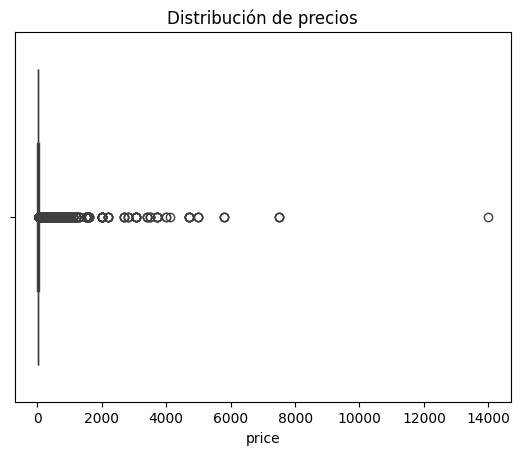

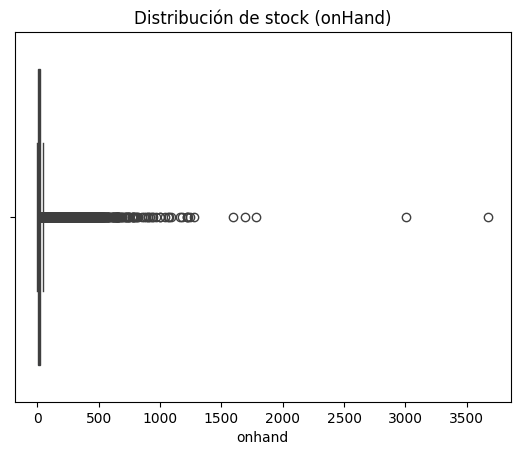

In [37]:
#Realizar grafico para ver valores extremos

sns.boxplot(x=df_final_de_inventario2['price'])
plt.title('Distribución de precios')
plt.show()

sns.boxplot(x=df_final_de_inventario2['onhand'])
plt.title('Distribución de stock (onHand)')
plt.show()


In [38]:
Q1 = df_final_de_inventario2['price'].quantile(0.25)
Q3 = df_final_de_inventario2['price'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor=df_final_de_inventario2.copy()
df_winsor['price'] = np.where(
    df_winsor['price'] > lim_sup, lim_sup,
    np.where(df_winsor['price'] < lim_inf, lim_inf, df_winsor['price']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas después del filtrado: {len(df_winsor)}")
print(f"Límites usados: {lim_inf:.2f} a {lim_sup:.2f}")


Filas originales: 223205
Filas después del filtrado: 223205
Límites usados: -11.01 a 44.99


In [39]:
Q1 = df_final_de_inventario2['onhand'].quantile(0.25)
Q3 = df_final_de_inventario2['onhand'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor['onhand'] = np.where(
    df_winsor['onhand'] > lim_sup, lim_sup,
    np.where(df_winsor['onhand'] < lim_inf, lim_inf, df_winsor['onhand']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas después del filtrado: {len(df_winsor)}")
print(f"Límites usados: {lim_inf:.2f} a {lim_sup:.2f}")

Filas originales: 223205
Filas después del filtrado: 223205
Límites usados: -15.50 a 44.50


In [40]:
print("\n📊 Estadísticas ANTES:")
print(df_final_de_inventario2[["price","onhand"]].describe())

print("\n📊 Estadísticas DESPUÉS (winsorizado):")
print(df_winsor[["price", "onhand"]].describe())


📊 Estadísticas ANTES:
               price         onhand
count  223205.000000  223205.000000
mean       23.616610      21.889187
std        79.422296      37.303803
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max     13999.900000    3676.000000

📊 Estadísticas DESPUÉS (winsorizado):
               price         onhand
count  223205.000000  223205.000000
mean       18.455982      16.451280
std        11.925975      13.153494
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max        44.990000      44.500000


In [41]:
# Exportar el DataFrame limpio (sin índices)
df_winsor.to_csv("datos_limpios.csv", index=False,sep=",", encoding='utf-8')

print("✅ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.")


✅ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.


In [42]:
#PARTE DOS
df_winsor_partedos=df_winsor.copy()

In [43]:
print(df_winsor_partedos.columns.tolist())

['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']


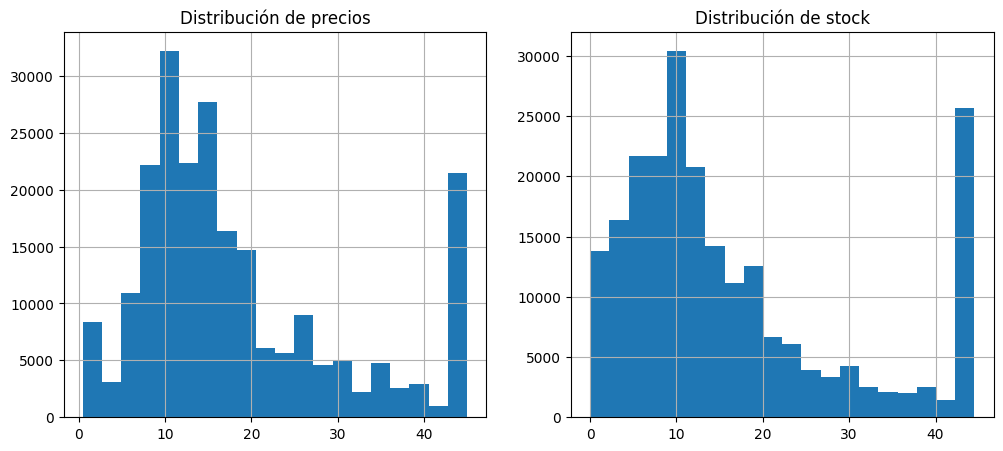

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df_winsor_partedos['price'].hist(bins=20)
plt.title('Distribución de precios')

plt.subplot(1,2,2)
df_winsor_partedos['onhand'].hist(bins=20)
plt.title('Distribución de stock')

plt.show()



In [75]:
df_winsor_partedos["brand"].unique()

array(['58', '62', '63', ..., '14682', '25958', '36079'],
      shape=(9653,), dtype=object)

In [76]:
df_winsor_partedos["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81])

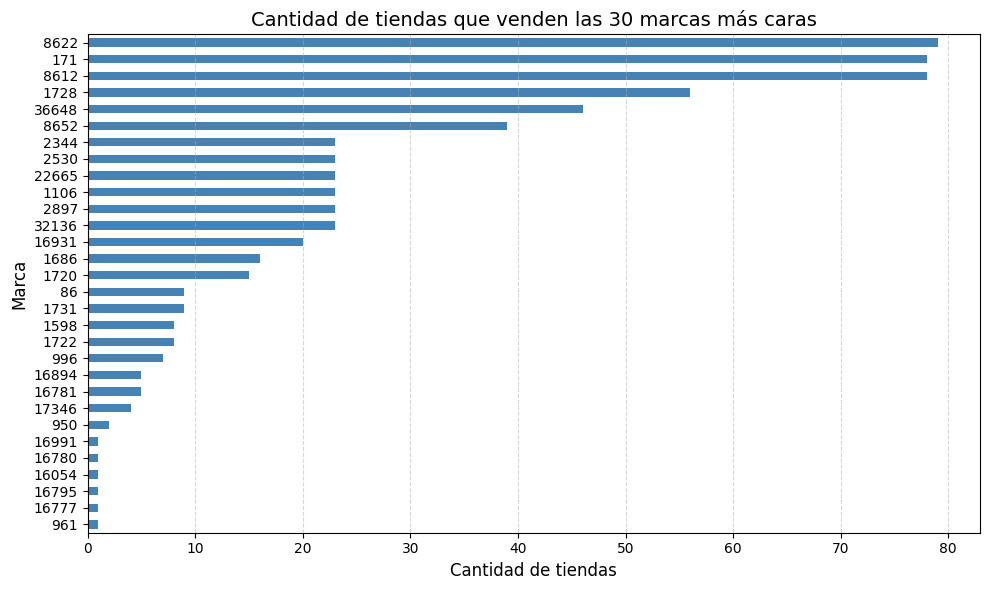

In [104]:
import matplotlib.pyplot as plt

# Calcular las 30 marcas más caras
top30_marcas = (
    df_winsor_partedos.groupby('brand')['price']
      .mean()
      .sort_values(ascending=False)
      .head(30)
      .index
)

# Filtrar el DataFrame con esas marcas
df_top30 = df_winsor_partedos[df_winsor_partedos['brand'].isin(top30_marcas)]

# Calcular cuántas tiendas distintas tienen cada una
marcas_tiendas = (
    df_top30.groupby('brand')['store']
    .nunique()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
marcas_tiendas.plot(kind='barh', color='steelblue')
plt.title('Cantidad de tiendas que venden las 30 marcas más caras', fontsize=14)
plt.xlabel('Cantidad de tiendas', fontsize=12)
plt.ylabel('Marca', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


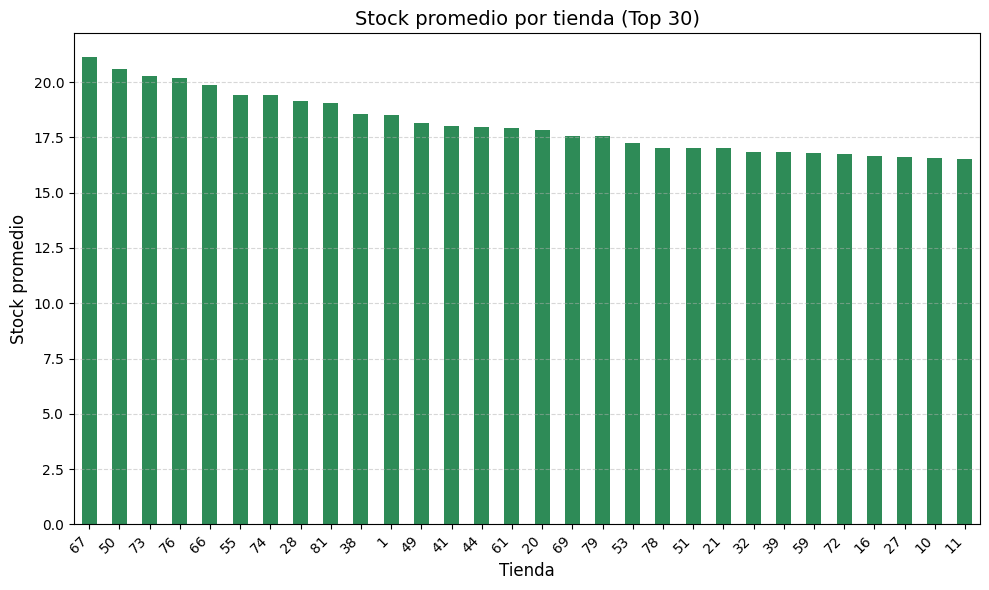

In [ ]:
# Promedio de stock por tienda, stock expresado en unidades.
stock_tienda = (
    df_winsor_partedos.groupby('store')['onhand']
      .mean()
      .sort_values(ascending=False)
)

# Si hay muchas tiendas, limitamos
top_tiendas = stock_tienda.head(30)

plt.figure(figsize=(10,6))
top_tiendas.plot(kind='bar', color='seagreen')
plt.title('Stock promedio por tienda (Top 30)', fontsize=14)
plt.ylabel('Stock promedio', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [64]:
df_winsor_partedos["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81])

In [99]:
#identificamos las 20 tiendas con mas stock, como en el paso anterior.
#usamos las marcas mas caras
top15_marcas = (
    df_winsor_partedos.groupby('brand')['price']
      .mean()
      .sort_values(ascending=False)
      .head(20)
      .index
)

top_tiendas = stock_tienda.head(20).index  # podés ajustar cuántas usar

df_filtro = df_winsor_partedos[
    df_winsor_partedos['brand'].isin(top15_marcas) &
    df_winsor_partedos['store'].isin(top_tiendas)
]




In [100]:
pivot_stock = (
    df_filtro.pivot_table(
        index='store',       # filas → cada tienda
        columns='brand',     # columnas → cada marca
        values='onhand',      # valores → stock
        aggfunc='sum',       # sumamos el stock
        fill_value=0
    )
)

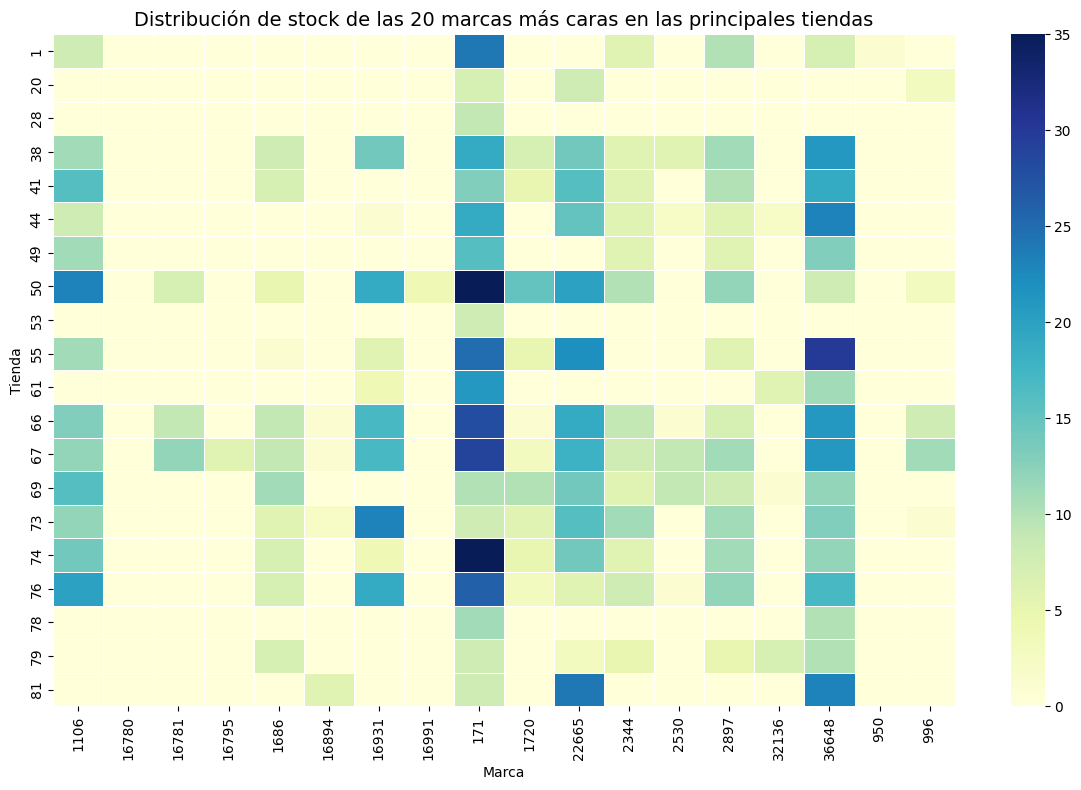

In [101]:

plt.figure(figsize=(12,8))
sns.heatmap(pivot_stock, cmap='YlGnBu', linewidths=.5)
plt.title('Distribución de stock de las 20 marcas más caras en las principales tiendas', fontsize=14)
plt.xlabel('Marca')
plt.ylabel('Tienda')
plt.tight_layout()
plt.show()

In [ ]:
#Cuanto más oscuro el color, más stock tiene esa marca en esa tienda.

In [106]:
#Guardar dataframe DTL
df_winsor_partedos.to_csv('marcas_top30.csv', index=False, encoding='utf-8')
